# Probability
### Understanding Uncertainty

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Introduction
- Where did the data come from?
- We don't understand, really, why dice come up the way they do, or people live or die, or why some people get jobs and others don't
- Humans have always turned to the concept of the arbitrary to make sense of their lives:
    - Chart analysis in finance: There is no theory, just the Darwinistic survival of heuristics
    - I Ching (Book of Changes): Chinese divination manual, based on casting yarrow stalks (and horoscopes, tarot, etc.)
    - Plato advocated using sortition (selection by lot) for political office on the principle of fairness/equality
    - Ecclesiastes: "I  have seen something else under the sun: The race is not to the swift or the battle to the strong, nor does food come to the wise or wealth to the brilliant or favor to the learned; but time and chance happen to them all."
- Likewise, we are not necessarily trying to understand the "why" of randomness, but instead develop a framework that expresses our subjective uncertainty over how it behaves

## Stochastic Modeling
- Imagine something "random":
    - Rolling a die
    - Playing Rock-Paper-Scissors
    - Surviving an accident or disease or surgery
    - Getting a job; getting laid off
    - The temperature tomorrow
- We don't know what values these things will take: From our perspective, there is irreducible error that renders them deterministically unpredictable
- Because of this inherent inability to predict exactly, we use probability to predict approximately
- This is the most abstract lecture in the course

## Roadmap
0. Set Theory
1. Probability Spaces
2. Random Variables 
3. Distributions and Densities

## 0. Set Theory
- Lots of probability is applied set theory: Lots of probability theory is about assigning numbers to sets to represent the relative likelihood they occur
- Set theory is the mathematical language for discussing collections of things
- We don't need a ton of set theory, mainly just the language and some basic ideas

## Sets
- A set is a collection of objects
- We can define a set by writing down its elements explicitly: $A = \{ a, b, c, ... z\}$
- The empty set $\varnothing$ is the set with no elements; it's useful for thinking about edge cases
- To assert that an object $x$ is an element of a set $A$, we write $x \in A$
- Mostly, we write $A = \{ x: \text{the proposition } P(x) \text{ is true } \}$, where $:$ means "such that". This is called **set builder** notation

## Exercises
- Plot the following sets: 
    - $A = \{x: x^2 -1 \ge 0 \}$ 
    - $B = \{ (x,y): 3x -2y \ge 0 \}$
    - $C = \{ (x,y): xy \ge 3 \}$
    - $D = \{ (x_1,x_2): x_1 \ge 0, x_2 \ge 0, x_1 + x_2 \le 1 \}$
- The power set of $A$ is the set of all subsets of $A$, denoted $\mathcal{P}(A)$. What is the power set of $\{ 1, 2, 3 \}$? (Hint: The empty set is a subset of every set; the whole set is a subset of itself.)

## Set Operations
- Recall, if we want to assert that $x$ is in a set $A$, we often write $x \in A$; the opposite assertion -- that $x$ is not in $A$ -- is written $x \notin A$
- What can we do with two sets, $A$ and $B$?
- The **union**: $A \cup B = \{ x: x \in A \text{ or } x \in B \}$
- The **intersection**: $A \cap B = \{x : x \in A \text{ and } x \in B \}$
- The **complement**: $ A \backslash B = \{ x : x \in A \text{ and } x \notin B \}$

## Exercises
State these relations in words, and show they're true (venn diagrams can be useful to sketch your intuition):
- $ (A \backslash B) \cup (A \cap B) = A $
- $ (A \cup B)^c = A^c \cap B^c $, $ (A\cap B)^c = A^c \cup B^c$
- $ A \cup ( B \cap C) = (A \cup B) \cap (A \cup C)$
- $ A \Delta B  = (A \backslash B) \cup (B \backslash A)$

Hint: Sometimes to show that $A = B$, it's easier to show that $ A \subseteq B$ and $B \subseteq A$

## Sets of Numbers
- There are some important sets of numbers:
    - The set of natural numbers, $\mathbb{N} = \{ 1, 2, 3, ... \} $
    - The set of integers, $\mathbb{Z} = \{ ... , -3, -2, -1, 0, 1, 2, 3, ... \} $
    - The set of rational numbers, $\mathbb{Q} = \{ q : q = n/m, \text{ such that } n,m \in \mathbb{Z} \}$
    - The set of real numbers, $\mathbb{R} = (-\infty, \infty)$
- Are there real numbers that aren't rational? Why do we need real numbers?
    - We are particularly interested in real numbers, but they're an abstraction
    - In stats, we often describe a variable as **numeric** which takes very finely distinguished values, like money or temperature or kilograms, and **categorical** otherwise 
    - In CS, we often consider any floating point number as being an approximation of a real number

## Functions
- A function $f$ is a rule that assigns a single element $y \in Y$ to every element $x \in X$, and we write $f: X \rightarrow Y$ and $f(x) = y$
- The set $X$ is called the **domain** and the set $Y$ is the **range**
- If $Y = \mathbb{R}$, then a function $f:X \rightarrow \mathbb{R}$ is called a real-valued function

## Exercises
Are the following things functions? Why or why not? If they are, what are their domains and ranges? 

- The solution to the quadratic equation, $ax^2 + bx + c = 0$?
- The inverse of a function $f$ is defined as $f^{-1}(y) = \{ x: f(x) =y \}$. In general, when is $f^{-1}(y)$ a function?

A "function" that maps points $x \in X$ to *subsets* of $Y$ is called a multi-function or correspondence. They're interesting. There's nothing wrong with them. They're really common in optimization and game theory. They have concepts of continuity and differentiability associated with them.

# 1. Probability Spaces

## Outcomes
- An **outcome** is anything that might happen.
    - A typical outcome will be represented by the symbol $z$ (or $\omega$)
    - The set of all outcomes or **the sample space** is $\mathcal{Z}$ (or $\Omega$)
- An **event** is a subset of outcomes, $E \subset \mathcal{Z}$
    - If an event $E$ is possible, then the **complementary event** is all of the outcomes not included in $E$, which we typically write as: $E^c = \mathcal{Z}\backslash E$. We "divide" all the outcomes in the event $E$ out of the set of all outcomes $ \mathcal{Z}$.
    - Events are sets: We can take unions $\cup$, intersections $\cap$, relative complements $\backslash$, symmetric differences $\Delta$, etc.

## Probability
- A **probability function** is a function $p: \mathcal{E} \rightarrow [0,1]$ that returns the probability of the event $E$
- Probability functions satisfy a set of axioms:
    1. "Something happens": $p(\mathcal{Z})=1$
    2. For every event $E$, $p(E) \ge 0$
    3. For any set of events $E_1, E_2, ..., E_N$ with $E_i \cap E_j = \varnothing$, 
    $$
    p\left( E_1 \cup E_2 \cup ... \cup E_n \right) = \sum_{i=1}^N p(E_i)
    $$

## Complementary, Disjoint
- Every event $E$ has a complement, $E^c = \mathcal{Z} \backslash E$, which corresponds to the event that "$E$ does not happen"
- Exercise: Show that if the probability of $E$ is $p(E)$, then the probability of $E^c$ is $p(E^c) = 1- p(E)$
- Events are **disjoint** if $ E \cap F = \varnothing$; if events are not disjoint, we have to be careful about handling their intersection, $E \cap F$

## Exercise: Coins and Dice
- What are the outcomes for a fair coin flip ($H$ or $T$)? What's the set of all events? If it's a fair coin, what are the probabilities of all the events?
- What are the outcomes for rolling a fair six-sided die? What's the set of all events? What are the probabilities of all the events?
- What about rolling the die twice? (There are 36 outcomes, and $2^{36} = 68,719,476,736$ events. So... maybe pace yourself with writing them all down?)
- What about rolling the die twice, and adding the results? (There are 11 outcomes, and $2^{11}=2048$ possible events.)

## Exercise: Rock-Paper-Scissors
- I like to use game theory to introduce some of these ideas, because they're interesting little math poems. Rock-Paper-Scissors is one of the simplest games.
- What's a game? There's a set of **players** (player A, player B). Each player has a set of **actions** (rock, paper, scissors). Each player has **payoffs** over outcomes (rock beats scissors, scissors beats paper, paper beats rock).
- So the **strategy set** is $\{R, P, S\}$ for players $A$ and $B$
- What is the set of outcomes for each player's behavior? What is the set of events that can happen in the game?
- What's the set of possible outcomes for one shot of the game? What is the set of all events for a single shot of the game? 
- If you play best-of-three RPS, how complex is the set of events and outcomes? Describe it, if you can't enumerate it completely
- Notice how quickly the set of events can grow

## NumPy
- To generate random integers, we can use NumPy
- The modern way to do this is to create a random number generator, setting a seed for reproducibility:
`
rng = np.random.default_rng(seed=100)
`
- Then the random number generator, `rng`, gets called to produce random values:
`
draws = rng.integers(low=0, high=10, size=20)
`

<BarContainer object of 10 artists>

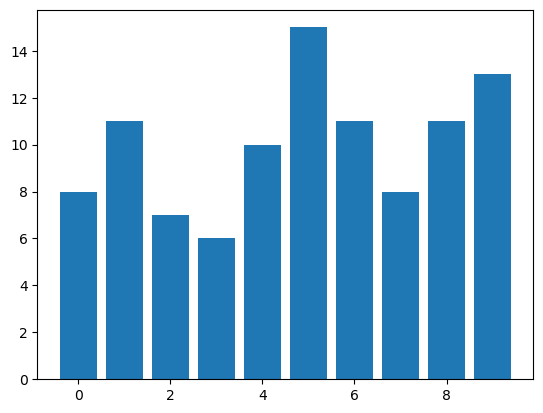

In [2]:
# Set seed
rng = np.random.default_rng(seed=100) # Set the seed for reproducibility

# Draw random values
draws = rng.integers(low=0, high=10, size=100) # Draw 20 integers at random from 0 to <10=9

# Plot results
values, counts = np.unique(draws,return_counts=True)
plt.bar(x=values,height=counts)


## Exercise: Simulating Dice
- Imagine rolling a fair single six-sided die. There are 6 outcomes, all equally likely. Describe the sample space and the space of events. What are the probabilities of the outcomes and events?
- Write code to simulate rolling a single six-sided die. Simulate 5000 rolls and plot the mass function and ECDF.
- Imagine rolling two fair six-sided die and adding them together. There are 11 outcomes (2 , 3, ..., 12), but not all equally likely. Describe the sample space and the space of events. What are the probabilities of the outcomes?
- Write code to simulate rolling two six-sided die and adding them together. Simulate 10000 rolls and plot the mass function and ECDF.

## Exercise: European Roulette
- Roulette is a betting game. I warn you that the roulette board is deranged and maybe not what you expect
- There are 37 possible outcomes: A green 0, and the numbers 1 to 36 in red and black
- Here is a picture of the (American, not Euro, it has an extra green 00) board:

![Roulette](./src/euro_roulette.jpg)


- Write code to model spinning the roulette wheel, including the colors and numbers (you could make two lists of number and color and draw a random number between 0 and 37... or use a dataframe with color and number variables... or use a dict with key to number/color pairs...)
- Describe the probability space associated with the roulette wheel: Outcomes, events, probabilities (If there are 37 outcomes, there are $2^{37}= 137,438,953,472$ events, by the way)

## Probability Space
- These concepts are so useful, we package them into a definition: A **probability space** is a triple, $(\mathcal{Z}, \mathcal{E}, p)$, of outcomes, events, and probabilities
- This is one core concept of probability theory, but as we've seen, its complexity grows really quickly

# 2. Random Variables

## Random Variables
- Here's the core definition of probability theory:
    - A **random variable** $X$ is a function mapping the sample space $\mathcal{Z}$ into a real number(s)
- This the object of study for us: How random variables turn uncertainty into quantities we can measure and understand
- This is a slippery concept
- I think that thinking of gambles as the most visceral version of a random variable is a great way to get the concept, but it applies more broadly, of course

## Exercise: Coin Flip
- Let's revisit the coin flip, where heads and tails are equally likely. Recall the set of outcomes and events and probabilties from earlier.
- Imagine you can place a bet on $H$ occurring: Say, $+500$ if you get $H$, and $-200$ if you get $T$
- Explain clearly how this gamble is a random variable
- Would you take this gamble? What about $+5000$ if you get $H$, and $-2000$ if you get $T$? What about $+5$ if you get $H$, and $-2$ if you get $T$?

## Exercise: Dice
- Let's revisit the problem of rolling two dice, and adding them together
- Imagine you can bet on the outcomes: "If I roll an outcome in set $A$, I win a dollar; if I roll an outcome in $\mathcal{Z}\backslash A$, I lose a dollar."
- Write a function that takes $A$ and simulates the gamble 1000 times
- For each simple gamble that is a number in 2, 3, ..., 12, run your code and plot the ECDF
- Which simple gamble is most likely to win?
- Do you need 68 billion events to characterize the uncertainty here?
- **THE GAMBLE IS THE RANDOM VARIABLE: A MAPPING FROM DIE ROLLS TO +1/-1**

## Exercise: RPS
- The players' payoffs in RPS depend on one another's actions, typically presented in a matrix:

| |  | Player A | | |
| :----- | :-----: | :----: | :-------: | :-------: |
| |  | R | P | S |
| Player B| R | 0, 0 | 1, -1 | -1, 1|
| | P | -1, 1 | 0, 0 | 1, -1|
| | S | -1, 1 | 1, -1 | 0, 0 |

- What's the sample space of actions for a player? The sample space of all outcomes of the game? The set of all events for the game? 
- How should the players pick the probabilities of using different strategies? This is called a **mixed strategy**.
- What are the probabilities of different outcomes in the game?
- Is there a reasonable prediction of the game where players only use two strategies, say, R and P?
- This is called a "zero sum game": The players' payoffs always sum to 1. What implication does this have for how people play these games?
- Are there other scenarios like this?
- **THE PAYOFF MATRIX IS THE RANDOM VARIABLE**: It maps the strategies used by the players into a payoff, a real number

## Exercise: Coordination

- Here's another game: Two students are planning to meet, but one forgot their phone. They had discussed meeting at SDS or at Grit. Their payoffs are:

| |  | Player A | | 
| :----- | :-----: | :----: | :-------: | 
| |  | SDS | Grit | 
| Player B| SDS | 1, 1 | 0, 0 | 
| | Grit | 0, 0 | 1, 1 | 

- What's the sample space? The set of all events? 
- How should the players pick the probabilities of using different strategies?
- What are the probabilities of different outcomes in the game?
- Is this a zero sum game?
- What are the answers to the above questions, if we change the game: 

| |  | Player A | | 
| :----- | :-----: | :----: | :-------: | 
| |  | SDS | Grit | 
| Player B| SDS | 2, 1 | 0, 0 | 
| | Grit | 0, 0 | 1, 2 | 


- What are other scenarios like this?
- **THE PAYOFF MATRIX IS THE RANDOM VARIABLE**: It maps the strategies used by the players into a payoff, a real number

## Exercise: Roulette
- A random variable is roughly a bet: Take the outcome of the uncertainty, and ask, "How much do I win?"
- To bet, you must pay a dollar, but then you get payouts that depend on how many slots are in your bet

![Roulette](./src/euro_roulette.jpg)


- Basic bets:
    - Red or Black slots
    - Odd or Even slots
    - A single slots, like 20
- More complex bets:
    - Split: Two adjacent slots (e.g. {1,2})
    - Square: Four adjacent slots (e.g. {1,2,4,5})
    - Street: Three slots in a row (e.g. {1,2,3})
    - Line: Six slots (e.g. {1,2,3,4,5,6})
- In general, you can only bet on 1, 2, 3, 4, 6 slots, 12 slots, or 18 slots
- If your bet occurs when the wheel is spun, you gain 36/K-1 where $K$ is the number of slots you bet on; if not, you lose a dollar and get -1.

- You wrote code to generate a spin of the roulette wheel. Now write a function that takes a gamble as an argument, and returns the result for the player (win or lose, and the payout 36/K-1 or -1)
- Simulate a few basic and complex bets 1000 times.
- **THE GAMBLE IS THE RANDOM VARIABLE: A MAPPING FROM WHEEL SPINS TO (36/K-1)/-1**

## Advanced Example: Binomial Asset Pricing Model
- Dice and RPS and roulette are nice, but they don't quite illustrate how powerful the idea of a random variable is. Let's take a look at asset pricing.
- Why? To give a clear example of how random variables $X$ map probability spaces $(\mathcal{Z},\mathcal{E},p)$ into numeric outcomes (asset prices) that we care about
- There is a stock whose initial price is $s_0 $
- Between period $t-1$ and $t$, it either jumps up in price to $s_t = u s_{t-1}$ with probability $p$, or down in price to $s_t = d s_{t-1}$. The variable $u$ is called the **up factor** and $d$ is called the **down factor**
- You can invest money risklessly, with a return of $r$
- For investing to make sense, $u>1+r>d$

## Two-Period Model
- If we only look at two periods, the BAPM looks like this:

![BAPM](./src/tree.png)

- Paths along the tree are multiplicative, so the probability of path $HH$ is $p^2$, the probability of $TT$ is $(1-p)^2$, and the probability of $HT$ and $TH$ are $p(1-p)$
- Exercise: What's the probability space over $\mathcal{Z} = \{ HH, HT, TH, TT \}$? Verify that $p(\mathcal{Z})=1$.

## Branching Paths
- For the first day, we can imagine this as a coin flip: An $H$ or $T$. There are 2 possible outcomes.
- For the first two days, we can imagine this as two coin flips: An $H$ or $T$, followed by a second $H$ or $T$. This leads to four outcomes: $HH$, $HT$, $TH$, and $TT$. There are $2^2=4$ possible outcomes.
- For the first three days, it expands by another layer of uncertainty: $HHH$, $HHT$, $HTH$, $THH$, and so on. There are $2^3=8$ possible outcomes.
- For the whole 250 days, there are $2^{250} = 1.8 \times 10^{75}$ possible outcomes... There's only $10^{80}$ atoms in the universe.

## $T$-Period Model
- This is a discrete time version of the Black-Scholes-Merton continuous time asset pricing model (as the time between jumps goes to zero, this becomes a geometric Brownian motion)
- There are about $T=250$ trading days per year
- Let's get parameters ($u$, $d$, $r$, $p$) from data for the S&P 500 Index

In [3]:
# Pull some data
import yfinance as yf

# SPDR S&P 500 ETF:
spy = yf.download('SPY', start='2023-01-01', end='2024-01-01')
returns = np.log(spy['Close'] / spy['Close'].shift(1)).dropna()

/tmp/ipykernel_6334/622560543.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  spy = yf.download('SPY', start='2023-01-01', end='2024-01-01')
[*********************100%***********************]  1 of 1 completed


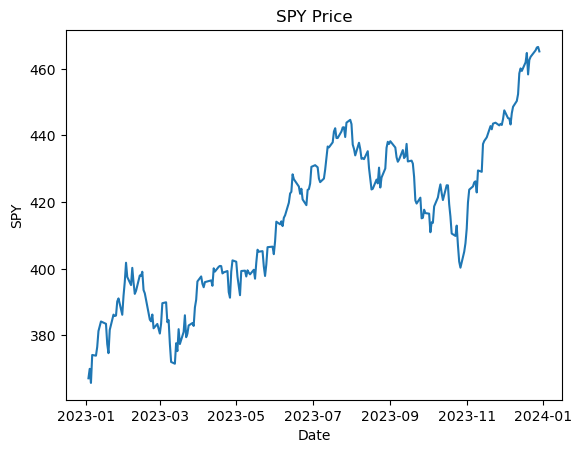

In [4]:
sns.lineplot(spy['Close']['SPY']).set(title='SPY Price')
plt.show()

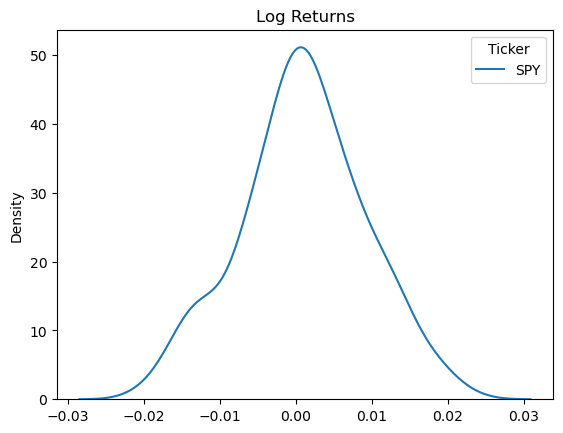

In [5]:
sns.kdeplot(returns).set(title='Log Returns')
plt.show()

In [6]:
# Annualized volatility from daily data
sigma = float( returns.std().iloc[0] ) * np.sqrt(250) # Return volatility
print(f'Process volatility is: {sigma}')

dt = 1/250 # 1/Number of trading days; time between observations

u = np.exp(sigma * np.sqrt(dt))  # From fenance
print(f'Up factor is: {u}')

d = np.exp(-sigma * np.sqrt(dt)) # From fenance
print(f'Down factor is: {d}')

r = 0.05/250  # assuming 5% annual risk-free rate
print(f'Daily interest rate is: {r}')

p = (1+r-d)/(u-d) # Risk-Neutral measure; common way to compute p

print(f'Probability of a jump up is: {p}')

Process volatility is: 0.13029006822363182
Up factor is: 1.0082743118930093
Down factor is: 0.991793590498726
Daily interest rate is: 0.0002
Probability of a jump up is: 0.5100753359127801


## Price Process
- Enumerating $(\mathcal{Z}, \mathcal{E}, p)$ sounds like a nightmare. But what is the random variable we're actually interested in? The price at the end of the year, when the call option is exercised or not.
- $X$ is the mapping from paths like $HTTHTT..HHH$ into a price at the end of the 252 days
- Let $\mathcal{Z}$ be the set of all $2^{250}$ possible price sequences. Then $X$ maps $\mathcal{Z}$ into a number, or $X:\mathcal{Z} \rightarrow \mathbb{R}$
- The combination of $X$ and $(\mathcal{Z},\mathcal{E},p)$ allows us to analyze the situation, but it's outrageously complex: There are $2^{250} = 1.8 \times 10^{75}$ possible price paths, and enumerating every event corresponds to $2^{2^{250}}$ possible events. The probability space is entirely precise, but hopelessly complex.
- Instead, we can pivot to using the random variable $X$ to filter the probability space into uncertainty we can understand: The ECDF and KDE of the price in a year

## Simulating a Coin Flip
- Imagine we have an unfair coin: It comes up $H$ with probability $p$ and $T$ with probability $1-p$
- The sample space is $\mathcal{Z} = \{ H, T \}$, and $\mathcal{E} = \{ \varnothing, H, T, HT, \}$
- If we wanted a 50/50 flip, we can draw a uniform random variate: If the result is below $.5$, assign $H$, and if above $.5$, assign $T$
- But, we can do the same procedure for the unfair coin: If the result is below $p$, assign $H$, and if above $p$, assign $T$
- This gives a probability $p$ of flipping an $H$ and $1-p$ of flipping a $T$

## Simulating the Price Path
- The price path is just a sequence of unfair coin flips
- Instead of trying to math out the entire space of possibilities, let's simulate instead
- Write code that simulates the stock price for a single year (250 days), starting from $p_0 = 370.57$
- Plot your time series alongside the real one, `spy['Close']`

The trick to use from earlier is:
- Each period, draw a uniformly distributed random number, $shock$: If $shock \le p$, then $s_{t}=u s_{t-1}$; otherwise, $s_{t+1} = d s_{t-1}$

## Exercise
- Compute the probability of any particular path in $S$ flips (Hint: Try expressing the probability of a specific path in terms of the probability of that many heads, $p^k$, times that many tails, $(1-p)^{S-k}$)
- Show that the probability of any particular path goes to zero as $S$ gets large (Hint: Rearrange your previous answer so that you have a term only in $S$ that is going to zero as $S$ increases)

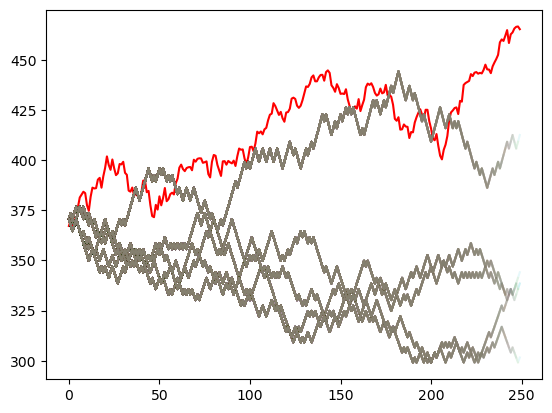

In [7]:
# Simulating the stock price path:

rng = np.random.default_rng(seed=100)

T = 250
n_sim = 5

sns.lineplot(spy['Close']['SPY'].values,color='red')
for sim in range(n_sim):
    price = [] # Price series storage
    shocks = rng.uniform(size=T) # Draw T shocks to determine price movement
    s = 370.57 # Starting price
    for t in range(T):
        price.append(s) # Update price path
        u_t = shocks[t] # Grab this period's shock
        if u_t < p: # If shock is less than p, the price goes up
            s = s * u
        else: # the price goes down
            s = s * d
        sns.lineplot(price, alpha=.1)

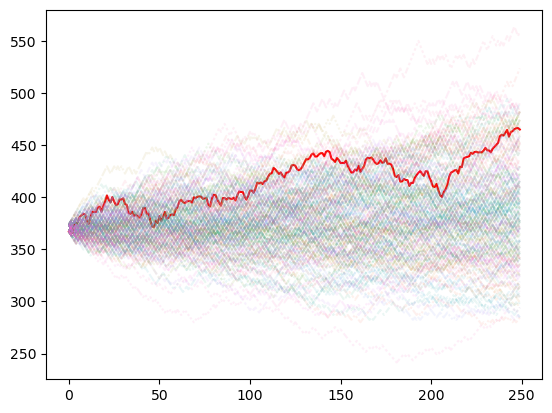

In [8]:
# Much faster version with vectorized calculations:

rng = np.random.default_rng(seed=100)

T = 250
n_sim = 200 # Number of simulations

shocks = rng.uniform(size=(T, n_sim)) # Draw shocks all at once
changes = np.where(shocks < p, u, d) # Replace shocks with their up/down factors
prices = (370.57)*np.cumprod(changes, axis=0) # Cumulatively multiply the paths

sns.lineplot(spy['Close']['SPY'].values,color='red')
sns.lineplot(prices,alpha=.1)
plt.legend().remove()

[Text(0.5, 1.0, 'KDE, year-end prices')]

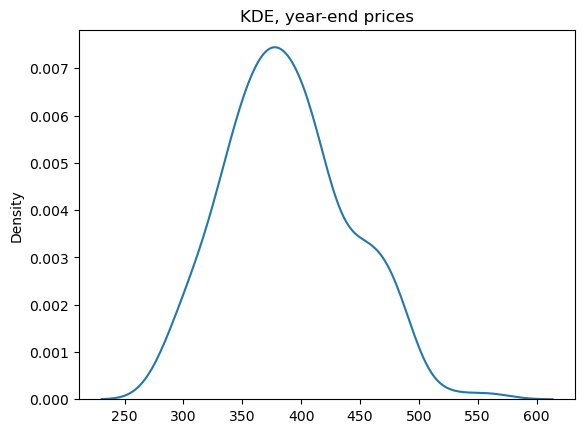

In [9]:
sns.kdeplot(prices[T-1,:]).set(title='KDE, year-end prices')

[Text(0.5, 1.0, 'ECDF, year-end prices')]

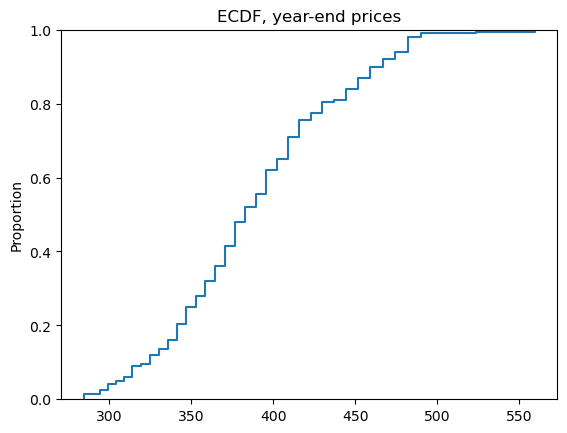

In [10]:
sns.ecdfplot(prices[T-1,:]).set(title='ECDF, year-end prices')

## The Random Variable
- There's typically no "easy" way to get the year-end prices from a formula (that is what the Black-Scholes-Merton asset pricing formula does, in a more complex setting)
- We've used simulation and a bit of data to map our uncertainty over paths into a simple pair of plots that faithfully captures our uncertainty
- The random variable here is the mapping from the price paths to final prices: We've translated a very complex and stochastic phenomenon, the realization of a price path, into a summary number, the year-end price
- We summarize this by saying that $X$ maps the set of outcomes $\mathcal{Z}$ into the real numbers, $\mathbb{R}$, or $X : \mathcal{Z} \rightarrow \mathbb{R}$
- This pattern created by the random variable is what takes our conceptual ideas about qualitative uncertainty, and turns them into numbers to analyze

## Options Pricing: European Call Option
- Why do we care about the year-end price? What do financial engineering people do?
- Imagine we were trying to do a very common thing with our stock price process, which is price a financial option
- A **European call option** gives you the right to buy a share of the asset in a year at a fixed price $K$ that is locked in today
- If the price $p_{252}\ge K$, you'll exercise the contract: You make money. If $p_{252}<K$, you won't exercise the contract: You'd lose money
- What is a fair price for this contract?
- Well, if we knew the behavior of $p_{252}$, we could decide whether a price was fair? Or, more precisely, the values that $X = \max\{0, p_{252}-K\}$ is likely to take
- Let's set $K = 390$, since the stock price is going up and is currently $370
- There is a very polite and overly verbose way of gambling on future prices; these are real things, I am not making them up

## Valuing the Call Option
- Now plot the ECDF of your simulated values of $X$
- This is what we care about, isn't it? The outcome of the random variable?

In [11]:
# Faster version with vectorized calculations:

rng = np.random.default_rng(seed=100)

T = 250
n_sim = 200 # Number of simulations

shocks = rng.uniform(size=(T, n_sim)) # Draw shocks all at once
changes = np.where(shocks < p, u, d) # Replace shocks with their up/down factors
prices = (370.57)*np.cumprod(changes, axis=0) # Cumulatively multiply the paths

strike = 390
eoy = prices[T-1,:]
net_value = [ np.max( (price- strike, 0)) for price in eoy] 

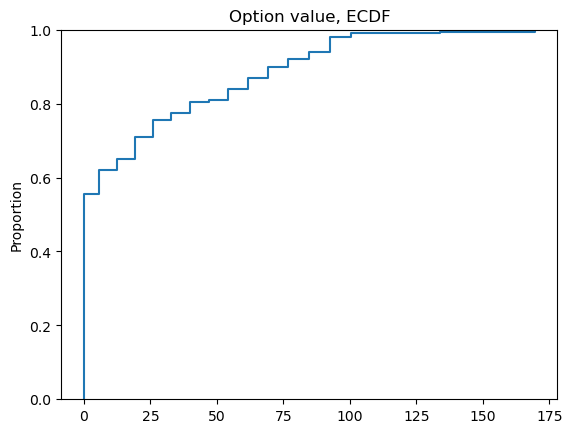

In [12]:
sns.ecdfplot(net_value).set(title='Option value, ECDF')
plt.show()

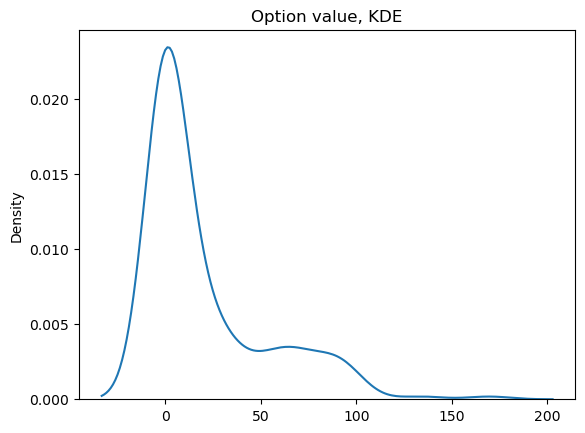

Fair price of the Euro Call Option: 20.134220424474858


In [13]:
sns.kdeplot(net_value).set(title='Option value, KDE')
plt.show()

print( f'Fair price of the Euro Call Option: {np.mean(net_value)}' )

- About a 56% of the time, the option is worthless because the price at day 250 has fallen below the strike price of 390: We don't exercise the option (cheaper to buy on the market)
- About 44% of the time, the option is "in the money" and gets exercised, because the year-end price exceeds the strike price
- These plots tell you exactly how risky this contract is
- This is what quantitative/mathematical finance is

## Asset Pricing
- The space of stock price paths $(\mathcal{Z}, \mathcal{E}, p)$ is very complex and often hard to analyze directly -- but we care about the price at day 250, not all that complexity per se
- We use the random variable $X = s_{250}$ or $X = \max\{ s_{250} -K, 0 \}$ to map paths into a distribution or density that summarizes what we really care about: The values of the underlying stock and the call option
- The ECDF and KDE subsume the complexity of the uncertainty by way of the random variable into something we can understand: The distribution and density functions

# 3. Distributions and Densities

## Mapping the Probability Space into Real Numbers $\rightarrow$ Random Variable
- The **Random Variable** is a core concept in probability: Mapping the outcome space into real numbers, and then studying the behavior of $X$ over $(\mathcal{Z},\mathcal{E},p)$ using the distribution and density functions 
- Even though we're dealing with the abstract reality of the uncertainty, we end up in a very similar place as with data: We need to somehow capture the complexity of the underlying process and convert it into a form we can manipulate and understand
- We now flip things around: **let's focus directly on the distribution, rather than worrying about the probability space $(\mathcal{Z}, \mathcal{E}, p)$ and random variable $X(z)$**
- So we're going to look at distributions that arise often, and look at their mathematical properties, without worrying about whether they came from stock prices or tumor growth

## From Random Variables to Cumulative Distribution Function
- In our asset pricing example, $X$ was the return on the option and we plotted the ECDF of $X$ to visualize/quantify its likely values
- This is the fundamental process of theoretical probability as well
- The **cumulative distribution function** of a random variable $X$ is the function
$$
F_X(x) = p[ X \le x ] = p[ \{z \text{ in } \mathcal{Z}:X(z)\le x \}]
$$
- This is a theoretical quantity, not the empirical CDF we looked at earlier. But, they are obviously related.
- For the same reasons as earlier, $F_X$ is the most fundamental way to think about the uncertainty associated with $X$
- Notice how once you introduce the random variable $X$, the probability space $(\mathcal{Z}, \mathcal{E}, p)$ is subsumed into $F_X$ and vanishes into the background? This is a conceptual win: Instead of worrying about the 137 billion possible events associated with roulette, worry instead about how to model the payoff of your gamble

## Properties of Distribution Functions

There are some abstract properties that every CDF must satisfy:

A function $F_X(x)$ is a cumulative distribution function if and only if...
- it is non-decreasing: If $x'>x$, then $F_X(x') \ge F_X(x)$
- it is right-continuous: $ \lim_{x' \downarrow x} F_X(x') = F_X(x)$
- it satisfies $\lim_{x \downarrow -\infty} F_X(x) = 0$ and $\lim_{x \uparrow +\infty} F_X(x) = 1$

Why? This probability $p[ X \le x]$ is non-decreasing in $x$, can only jump up because the set $X(z)\le x$ smoothly grows, and it must take values between 0 and 1 because it's a probability of an event.

## Exercise:
- Visualize these functions and show they are the CDFs of some random variable:

1. $F(x) = \begin{cases}
0, & x \le 0 \\
\sqrt{x}, & 0 \le x \le 1 \\
1, & x \ge 1 
\end{cases}
$
2. $F(x) = \dfrac{1}{1+e^{-x}}$
3. For $ a < b < c$,
$
F(x) = \begin{cases}
0, & x \le 0 \\
\frac{(x-a)^2}{(b-a)(b-c)}, & a \le x \le c \\
1 - \frac{(b-x)^2}{(b-a)(b-c)}, & c < x < b \\
1, & x \ge b
\end{cases}
$
4. $ F(x) = \begin{cases}
0, & x <0 \\
1 - e^{-x}, & x>0
\end{cases}
$
5. $ F(x) = \begin{cases}
0, & x \le 0 \\
x, & 0 < x < 1\\
1, & x \ge 1
\end{cases}
$

## 

## From Distribution to Density or Mass Function
- With the ECDF, we derived the kernel density by a term that looked like a derivative
- The **probability density function** of $F_X$ is
$$
f_X(x) = \lim_{h \rightarrow 0} \dfrac{F_X(x+h) - F_X(x-h)}{2h} = F_X'(x)
$$
- The **probability mass function** of $F_X$ is 
$$
m_X(x) = p(X = x) = p(\{z \text{ in } \mathcal{Z}: X(z) = x\})
$$
- So the temperature tomorrow is a real number, so we model it with a density function. The outcome of the roulette wheel is chunky (countable), so we model it with a mass function.

## A Puzzle: Densities on "Large" Sets
To demonstrate how weird probability can get, let's explore a thought experiment?

- What proportion of integers between 1 and 10 are even?
- What proportion of integers between 1 and 100 are even?
- What proportion of integers between 1 and 1000 are even?
- What proportion of integers between 1 and $\infty$ are even?

But what's the probability of drawing the number 1862 at random from $ 0,1,2,3, ... = \mathbb{Z}_+$, if each integer has an equal value of being drawn?

What's the probability of drawing the number .5 at random from $[0,1]$, if each real number has an equal value of being drawn? (How many real numbers between 0 and 1 are there? Imagine starting with rational numbers like $n/m$ where $m>n$ and $n,m$ are both integers, similar to what we did with the integers.)

Earlier, we showed that as $T$ got large, the probability of every price path went to zero.

So, the probability of events can remain well-defined as the density becomes weird and counterintuitive; it's one reason to prefer the distribution function.

## So, Density is Not Probability: It gets weird
- It is tempting to think of $f_X(u) = F_X'(u)$ as kind of probability, but it isn't
- If the distribution function has a density at $u$, the probability that a specific $u$ happens is zero
- This is subtle and potentially confusing

## Exercise:
- Determine the density functions for these distributions. Are the densities bounded in value between 0 and 1, or not?

1. $F(x) = \begin{cases}
0, & x \le 0 \\
\sqrt{x}, & 0 \le x \le 1 \\
1, & x \ge 1 
\end{cases}
$
2. $F(x) = \dfrac{1}{1+e^{-x}}$
3. For $ a < b < c$,
$
F(x) = \begin{cases}
0, & x \le 0 \\
\frac{(x-a)^2}{(b-a)(b-c)}, & a \le x \le c \\
1 - \frac{(b-x)^2}{(b-a)(b-c)}, & c < x < b \\
1, & x \ge b
\end{cases}
$
4. $ F(x) = \begin{cases}
0, & x <0 \\
1 - e^{-x}, & x>0
\end{cases}
$
5. $ F(x) = \begin{cases}
0, & x \le 0 \\
x, & 0 < x < 1\\
1, & x \ge 1
\end{cases}
$

## Conclusion
- We have a fundamental probability space $(\mathcal{Z}, \mathcal{E}, p)$
- We have a random variable $X$ that maps outcomes $\mathcal{Z}$ into real numbers $\mathbb{R}$
- When we simplify this complexity with $F_X(x) = pr(\{z\in \mathcal{Z}: X(z) \le x\})$, we get the distribution function/CDF
- When we compute $f_X(x) = F_X(x)$ we get the density function/pdf
- Often, we just start from the distribution and density functions in analysis, but this foundation is always there